In [9]:
import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns ### install using pip install seaborn

In [10]:
pd.options.display.max_rows=10

d = pd.read_csv("tidyVRtrackdata_13Apr2020.csv")
direction = pd.read_csv("DirectionData_1Dec20.csv")
rotation = pd.read_csv("RotationData_1Dec20.csv")
print(direction)
print(rotation)

     labvisitid  presence     x_0.5       x_1     x_1.5       x_2     x_2.5  \
0             1       4.0 -0.032859 -0.048084 -0.097676 -0.138635 -0.146665   
1             2       3.2  0.106513  0.076684  0.143966  0.249650  0.269067   
2             3       3.4  0.053312  0.052485  0.055687  0.076028  0.076897   
3             4       2.8 -0.010841 -0.007432 -0.016471  0.053747  0.145198   
4             5       3.4  0.104969  0.034937 -0.045508 -0.097222 -0.102852   
..          ...       ...       ...       ...       ...       ...       ...   
211         259       2.8 -0.046098 -0.046640 -0.043561 -0.043887 -0.051394   
212         260       3.4 -0.109115 -0.023875 -0.013926 -0.011415  0.129369   
213         261       4.0  0.147010  0.144011  0.145500  0.175783  0.298513   
214         262       4.8 -0.186013 -0.185717 -0.167623 -0.132319 -0.163660   
215         263       4.4  0.056340  0.052543  0.023423  0.004525  0.087873   

          x_3     x_3.5       x_4  ...  z_458  z_45

In [11]:
rotation1 = rotation.iloc[:, 2:2775].copy()
print(rotation1)

       yaw_0.5      yaw_1    yaw_1.5      yaw_2    yaw_2.5      yaw_3  \
0   -12.819052 -21.993694 -36.960159 -36.280998 -36.989056 -40.799503   
1   -14.121522 -22.114445  15.133641  52.189201  61.190361  37.750393   
2     0.382742   0.378596   0.582055   5.480828   5.522862   4.240273   
3     9.441733   7.737449  14.775006  27.758444  26.661465  24.432079   
4    -0.114574 -15.798509 -32.600330 -48.695320 -54.353134 -48.824638   
..         ...        ...        ...        ...        ...        ...   
211   5.935023   5.873085   5.766204   5.312215   3.314018   3.622424   
212  13.093811  31.872623  38.386806  36.681343  36.229832  28.970854   
213   3.386689   3.411526   4.242085  12.630816  39.351212  56.288612   
214 -38.686317 -35.825687 -30.154709 -27.877270 -29.027622 -35.389099   
215  17.530165  17.689573  16.843994  14.752871  17.489843  46.700539   

       yaw_3.5      yaw_4    yaw_4.5      yaw_5  ...  roll_457  roll_457.5  \
0   -39.966045 -38.430420 -41.280598 -51.8277

In [37]:
rot_scaling = rotation1.values
scaler = MinMaxScaler()
rot_scaled = scaler.fit_transform(rot_scaling)
print(rot_scaled)

[[0.4244074  0.39814807 0.33181673 ...        nan        nan        nan]
 [0.41928916 0.39768673 0.52826746 ...        nan        nan        nan]
 [0.47628564 0.48362331 0.47339203 ...        nan        nan        nan]
 ...
 [0.48809006 0.49521088 0.48719435 ...        nan        nan        nan]
 [0.32275846 0.34530176 0.35748074 ...        nan        nan        nan]
 [0.54366878 0.54976137 0.53471736 ...        nan        nan        nan]]


In [38]:
#model = AgglomerativeClustering(n_clusters=3)

#cluster_labels = model.fit_predict(rot_scaled)

rotsc_df = pd.DataFrame(rot_scaled, columns=rotation1.columns)

rotsc_nona = rotsc_df.dropna(axis='columns')

model = AgglomerativeClustering(n_clusters=3)

rot_cl_labels = model.fit_predict(rotsc_nona)
print(rotsc_nona)
print(rot_cl_labels)

        yaw_5     yaw_6   yaw_8.5     yaw_9   yaw_9.5    yaw_11  yaw_11.5  \
0    0.376198  0.373464  0.234313  0.230268  0.215929  0.327263  0.311014   
1    0.365975  0.364849  0.295186  0.327652  0.310617  0.212569  0.211563   
2    0.509084  0.502093  0.377775  0.428437  0.394812  0.312896  0.282058   
3    0.697562  0.708244  0.639718  0.704556  0.661017  0.670843  0.679325   
4    0.373103  0.374215  0.326398  0.386609  0.359841  0.313455  0.308263   
..        ...       ...       ...       ...       ...       ...       ...   
214  0.603600  0.603248  0.274652  0.377225  0.355682  0.240747  0.212731   
215  0.673793  0.705850  0.700280  0.801208  0.789068  0.831314  0.850716   
216  0.681959  0.688879  0.619314  0.504946  0.279985  0.047556  0.075814   
217  0.312647  0.295715  0.189959  0.225346  0.222026  0.221811  0.218759   
218  0.722186  0.702052  0.750791  0.855860  0.807569  0.736962  0.733946   

       yaw_12    yaw_13    yaw_14  ...  roll_73.5   roll_74  roll_74.5  \
0

In [39]:
data_reducer = umap.UMAP()
rot_umap_data = data_reducer.fit_transform(rotsc_nona)


rot_scaled_umap_data = scaler.fit_transform(rot_umap_data)


''' add back to a dataframe because it's easier to keep track of things
(all indices and columns have names that we can reference)'''

rot_reduced = pd.DataFrame(rot_scaled_umap_data,columns=['UMAP Dim. #1', 'UMAP Dim. #2'])

''' add in our clustering labels from hierarchical clustering '''
rot_reduced['rot_cl_labels'] = rot_cl_labels

''' check out the reduced data here!'''
print(rot_reduced)

     UMAP Dim. #1  UMAP Dim. #2  rot_cl_labels
0        0.386734      0.687342              2
1        0.558712      0.883128              2
2        0.895402      0.799321              0
3        0.563606      0.938999              2
4        0.991025      0.821443              0
..            ...           ...            ...
214      0.275245      0.825542              2
215      0.880612      0.975650              0
216      0.901067      0.936683              0
217      0.850385      0.894917              0
218      0.908878      0.056458              0

[219 rows x 3 columns]


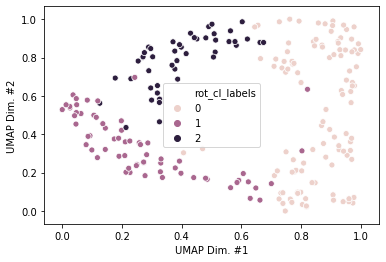

In [40]:
sns.scatterplot(x='UMAP Dim. #1', y='UMAP Dim. #2',
            hue='rot_cl_labels', data=rot_reduced)

In [41]:
# PCA

rot_PCAreducer = PCA(n_components=4)

rotPCA = rot_PCAreducer.fit_transform(rotsc_nona)
print(rotPCA)

[[ 9.26424759e-01 -7.78753526e-01 -1.35902267e+00  5.28892055e-01]
 [-4.87724761e-01 -2.09739536e+00  1.39634217e+00 -9.74630024e-02]
 [-1.95960090e+00 -1.00078864e+00 -1.82488543e-01 -8.34910417e-01]
 [-5.85474911e-01 -1.75223640e+00  2.05885388e+00  3.71624804e-01]
 [-1.24917110e+00 -4.11164671e-01 -1.14123027e+00 -1.37764405e-01]
 [-1.74357544e+00 -1.65193705e+00 -1.92196994e+00  5.76349347e-01]
 [-8.40544357e-01 -5.22986087e-01 -2.98758848e+00  3.93317421e-01]
 [-1.91540538e+00  2.58985676e-01 -1.27425906e-01  1.11738581e-01]
 [ 2.81399380e+00  8.34281708e-01 -4.61626268e-01 -9.85363810e-01]
 [ 1.33774571e+00  1.32302014e+00  1.10105547e-01  7.61741894e-01]
 [-1.13066359e+00 -8.67585598e-01 -2.65364867e+00  4.80760060e-01]
 [-1.40146296e+00 -7.42062283e-01 -1.08481009e+00 -2.47815526e-01]
 [-1.92305737e+00 -5.90007253e-01 -1.26331770e+00 -8.49311509e-02]
 [ 7.46406984e-02 -2.54743164e+00 -1.22845595e+00  1.08689079e+00]
 [ 4.21819722e-01  2.49152432e+00 -1.87599698e-01 -1.06502189e

In [42]:
''' This loop gives us the top feature of each component using the argmax function '''
top_features = [np.abs(rot_PCAreducer.components_[i]).argmax() for i in range(rot_PCAreducer.components_.shape[0])]


''' Now, we go back to our original feature names (columns of our dataset), and get the names of the 4 key features '''
top_feature_names = [list(rotsc_nona.columns)[top_features[i]] for i in range(rot_PCAreducer.components_.shape[0])]

''' printing the names '''
for n,name in enumerate(top_feature_names):
    print("#" + str(n) + ": " + str(name))

#0: yaw_50.5
#1: yaw_71
#2: roll_53
#3: pitch_41.5


In [43]:
newrot = rotsc_nona[top_feature_names]
print(newrot)

     yaw_50.5    yaw_71   roll_53  pitch_41.5
0    0.854208  0.355169  0.682721    0.347382
1    0.563693  0.820713  0.185542    0.379383
2    0.171139  0.771243  0.420272    0.622378
3    0.678845  0.768792  0.102073    0.354990
4    0.266359  0.742557  0.608721    0.738296
..        ...       ...       ...         ...
214  0.903070  0.821337  0.727376    0.410790
215  0.233270  0.786760  0.585841    0.488213
216  0.186569  0.752096  0.856116    0.710604
217  0.328154  0.881064  0.585954    0.443852
218  0.257796  0.354208  0.520454    0.252851

[219 rows x 4 columns]


In [44]:
rotsc_nona

,yaw_5,yaw_6,yaw_8.5,yaw_9,yaw_9.5,yaw_11,yaw_11.5,yaw_12,yaw_13,yaw_14,...,roll_73.5,roll_74,roll_74.5,roll_75,roll_75.5,roll_76,roll_76.5,roll_77,roll_77.5,roll_79
0,0.376198,0.373464,0.234313,0.230268,0.215929,0.327263,0.311014,0.270549,0.327315,0.275076,...,0.629263,0.582712,0.710099,0.637345,0.703479,0.582113,0.571308,0.649079,0.623801,0.596088
1,0.365975,0.364849,0.295186,0.327652,0.310617,0.212569,0.211563,0.164954,0.195948,0.203697,...,0.534084,0.536563,0.534913,0.538490,0.541780,0.419807,0.311199,0.369408,0.327619,0.211490
2,0.509084,0.502093,0.377775,0.428437,0.394812,0.312896,0.282058,0.211525,0.240049,0.250272,...,0.530190,0.547277,0.544557,0.547727,0.564634,0.452303,0.463019,0.562095,0.474575,0.461948
3,0.697562,0.708244,0.639718,0.704556,0.661017,0.670843,0.679325,0.691220,0.661292,0.616317,...,0.302304,0.324892,0.322120,0.305598,0.284190,0.193155,0.131782,0.371387,0.300332,0.301552
4,0.373103,0.374215,0.326398,0.386609,0.359841,0.313455,0.308263,0.268896,0.336316,0.319811,...,0.705702,0.681827,0.684085,0.693106,0.713194,0.592236,0.662583,0.731525,0.663359,0.613272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.603600,0.603248,0.274652,0.377225,0.355682,0.240747,0.212731,0.145158,0.156770,0.204607,...,0.638688,0.638036,0.649994,0.668913,0.670741,0.538656,0.584703,0.653319,0.569203,0.537068
215,0.673793,0.705850,0.700280,0.801208,0.789068,0.831314,0.850716,0.855165,0.922288,0.958244,...,0.637999,0.610506,0.685770,0.762146,0.701871,0.538495,0.507239,0.591919,0.696353,0.503064
216,0.681959,0.688879,0.619314,0.504946,0.279985,0.047556,0.075814,0.098893,0.186838,0.229735,...,0.713930,0.692342,0.726074,0.723208,0.713667,0.588550,0.639587,0.728759,0.650384,0.494049
217,0.312647,0.295715,0.189959,0.225346,0.222026,0.221811,0.218759,0.186866,0.243536,0.247233,...,0.552220,0.556997,0.537303,0.548746,0.638184,0.499556,0.576174,0.650925,0.554003,0.496503


In [46]:
rot_dv = rotation.iloc[:, 1].copy()
print(rot_dv)

0      3
1      4
2      3
3      7
4      3
      ..
214    7
215    7
216    7
217    4
218    3
Name: pb_con, Length: 219, dtype: int64


In [47]:
rot2 = pd.concat([rot_dv, rotsc_nona], axis=1, sort=False)
print(rot2)

     pb_con     yaw_5     yaw_6   yaw_8.5     yaw_9   yaw_9.5    yaw_11  \
0         3  0.376198  0.373464  0.234313  0.230268  0.215929  0.327263   
1         4  0.365975  0.364849  0.295186  0.327652  0.310617  0.212569   
2         3  0.509084  0.502093  0.377775  0.428437  0.394812  0.312896   
3         7  0.697562  0.708244  0.639718  0.704556  0.661017  0.670843   
4         3  0.373103  0.374215  0.326398  0.386609  0.359841  0.313455   
..      ...       ...       ...       ...       ...       ...       ...   
214       7  0.603600  0.603248  0.274652  0.377225  0.355682  0.240747   
215       7  0.673793  0.705850  0.700280  0.801208  0.789068  0.831314   
216       7  0.681959  0.688879  0.619314  0.504946  0.279985  0.047556   
217       4  0.312647  0.295715  0.189959  0.225346  0.222026  0.221811   
218       3  0.722186  0.702052  0.750791  0.855860  0.807569  0.736962   

     yaw_11.5    yaw_12    yaw_13  ...  roll_73.5   roll_74  roll_74.5  \
0    0.311014  0.270549  

In [50]:
rot2df = pd.DataFrame(rot2)
rot2df

,pb_con,yaw_5,yaw_6,yaw_8.5,yaw_9,yaw_9.5,yaw_11,yaw_11.5,yaw_12,yaw_13,...,roll_73.5,roll_74,roll_74.5,roll_75,roll_75.5,roll_76,roll_76.5,roll_77,roll_77.5,roll_79
0,3,0.376198,0.373464,0.234313,0.230268,0.215929,0.327263,0.311014,0.270549,0.327315,...,0.629263,0.582712,0.710099,0.637345,0.703479,0.582113,0.571308,0.649079,0.623801,0.596088
1,4,0.365975,0.364849,0.295186,0.327652,0.310617,0.212569,0.211563,0.164954,0.195948,...,0.534084,0.536563,0.534913,0.538490,0.541780,0.419807,0.311199,0.369408,0.327619,0.211490
2,3,0.509084,0.502093,0.377775,0.428437,0.394812,0.312896,0.282058,0.211525,0.240049,...,0.530190,0.547277,0.544557,0.547727,0.564634,0.452303,0.463019,0.562095,0.474575,0.461948
3,7,0.697562,0.708244,0.639718,0.704556,0.661017,0.670843,0.679325,0.691220,0.661292,...,0.302304,0.324892,0.322120,0.305598,0.284190,0.193155,0.131782,0.371387,0.300332,0.301552
4,3,0.373103,0.374215,0.326398,0.386609,0.359841,0.313455,0.308263,0.268896,0.336316,...,0.705702,0.681827,0.684085,0.693106,0.713194,0.592236,0.662583,0.731525,0.663359,0.613272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,7,0.603600,0.603248,0.274652,0.377225,0.355682,0.240747,0.212731,0.145158,0.156770,...,0.638688,0.638036,0.649994,0.668913,0.670741,0.538656,0.584703,0.653319,0.569203,0.537068
215,7,0.673793,0.705850,0.700280,0.801208,0.789068,0.831314,0.850716,0.855165,0.922288,...,0.637999,0.610506,0.685770,0.762146,0.701871,0.538495,0.507239,0.591919,0.696353,0.503064
216,7,0.681959,0.688879,0.619314,0.504946,0.279985,0.047556,0.075814,0.098893,0.186838,...,0.713930,0.692342,0.726074,0.723208,0.713667,0.588550,0.639587,0.728759,0.650384,0.494049
217,4,0.312647,0.295715,0.189959,0.225346,0.222026,0.221811,0.218759,0.186866,0.243536,...,0.552220,0.556997,0.537303,0.548746,0.638184,0.499556,0.576174,0.650925,0.554003,0.496503


In [53]:

''' define the SVC model here '''
svm_model = SVC(kernel='linear')


''' 
Stratified K-Fold will randomly and automatically generate 5 random partitions of the data for cross validation

'''
skf = StratifiedKFold(n_splits=5)



''' 
We have 3 classes, so our SVM will make 3 hyperplanes, we want to know which features were, on
average, most important in making all 3 of these hyperplanes
        
Each test set will have slightly different feature importances so we will 
sum the results for each test set using array addition
'''
all_feature_importances = np.zeros((len(set(rot2df.pb_con)),len(rotsc_nona.columns)))


''' we need to keep track of the corresponding labels from all our random test sets so we can make a
confusion matrix '''
all_labels = []


''' we need to keep track of the corresponding predictions from all our random test sets so we can make a
confusion matrix '''
all_predictions = []


''' we need to keep track of all our accuracy values across all 5 splits'''
accuracy = 0


for train_index, test_index in skf.split(rotsc_nona.values, rot2df.pb_con):
    
        ''' training dataset '''
        X_train, y_train = rotsc_nona.values[train_index], rot2df.pb_con[train_index]

        
        ''' testing dataset '''
        X_test, y_test = rotsc_nona.values[test_index], rot2df.pb_con[test_index]

        
        ''' fit the model to the data - this is where the algorithm learns the patterns and finds
        the hyperplane'''
        svm_model.fit(X_train,y_train)
        
        
        ''' 
        The coef values tell us which features were most important in finding the SVM hyperplanes
        We can only do this for a linear SVM, which does not add on extra dimensions. 
        
        In many cases, decision tree methods work better for interpretation
        '''
        all_feature_importances += svm_model.coef_
        
        
        ''' now, we will predict the labels'''
        predictions = svm_model.predict(X_test)
        
        
        ''' 
        Use the extend function to add the new predictions onto the list of predictions
        list = [1,2]
        list.extend([3,4])
        list = [1,2,3,4]
        '''
        all_predictions.extend(predictions)
        
        ''' Use extend function to add the new labels onto the list of labels'''
        all_labels.extend(y_test)
        
        ''' add the new accuracy score to the other scores - we will average them at the end'''
        accuracy += accuracy_score(predictions,y_test)

print("PREDICTION ACCURACY")
print(accuracy/5)
print()
print('ALL LABELS')
print(all_labels)
print()
print('ALL PREDICTIONS')
print(all_predictions)


/Users/AlexDolwick/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


ValueError: operands could not be broadcast together with shapes (13,303) (66,303) (13,303) 

In [17]:
# The basic structure of a class
class DataPrint:
    # You can define attributes here or anywhere else in the class.
    
    # The init function
    def __init__(self, data):
        self.data = data
    
    def print_data(self):
        print(self.data)

In [19]:
test = DataPrint("rotation")
test.print_data

<bound method DataPrint.print_data of <__main__.DataPrint object at 0x1a256610f0>>